<a href="https://colab.research.google.com/github/bam396/nyu-python-public-policy/blob/master/HW_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOMEWORK 6 Coding: Trends in when different types of 311 occur over time

**Problem Statement:** Some 311 complaint types have interesting trends over time. Some are more prevalent at certain times of day, days of the week, seasons, etc. In this homework you will isolate the 10 most common complaint types and look at trends in when they occur.


In [0]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt 

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [36]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
df['complaint_type'] = df['complaint_type'].str.lower()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,homeless person assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
1,1,1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,door/window,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",109.0
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,noise - residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,request large bulky item collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0




---


# Step 1. 
Create a list of the top 10 complaint types (i.e. the complaint type categories that have the most records in our 311 dataset). Save the list as an object called top_10.

In [39]:
top_10 = df.groupby('complaint_type').size().nlargest(10).reset_index(name='count_311')
top_10 = top_10.complaint_type
top_10.head(10)

0                    noise - residential
1                         heat/hot water
2                        illegal parking
3    request large bulky item collection
4                       blocked driveway
5                noise - street/sidewalk
6                       street condition
7                   unsanitary condition
8                           water system
9                                  noise
Name: complaint_type, dtype: object



---


# Step 2.
 
Filter the 311 dataset to only 311 requests that have complaint types in top_10. Save this subset of data as a dataframe called filtered_311.

In [40]:
filtered_311 = df[df.complaint_type.isin(top_10)]
#checking code
filtered_311.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,noise - residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,request large bulky item collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0
5,5,5,39882413,08/01/2018 12:01:09 AM,08/01/2018 02:08:54 AM,NYPD,New York City Police Department,noise - street/sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0
6,6,6,39884833,08/01/2018 12:01:10 AM,08/05/2018 01:10:41 AM,NYPD,New York City Police Department,noise - street/sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 08:01:10 AM,The Police Department responded to the complai...,08/05/2018 01:10:41 AM,12 MANHATTAN,1.021620e+09,MANHATTAN,1002311.0,248532.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848819,-73.934718,"(40.84881949308954, -73.93471813672973)",112.0


**Step 3.** Convert the created_date column in filtered_311 to be a datetime series.

In [41]:
filtered_311.created_date = pd.to_datetime(filtered_311.created_date, format='%m/%d/%Y %I:%M:%S %p')
#checking code
filtered_311.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
2,2,2,39882869,2018-08-01 00:00:54,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,noise - residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,2018-08-01 00:01:00,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,2018-08-01 00:01:00,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,request large bulky item collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0
5,5,5,39882413,2018-08-01 00:01:09,08/01/2018 02:08:54 AM,NYPD,New York City Police Department,noise - street/sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0
6,6,6,39884833,2018-08-01 00:01:10,08/05/2018 01:10:41 AM,NYPD,New York City Police Department,noise - street/sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 08:01:10 AM,The Police Department responded to the complai...,08/05/2018 01:10:41 AM,12 MANHATTAN,1.021620e+09,MANHATTAN,1002311.0,248532.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848819,-73.934718,"(40.84881949308954, -73.93471813672973)",112.0


In [80]:
# removing the Unnamed Columns. Professor Kates - do you know why I got them?

filtered_311 = filtered_311.drop("Unnamed: 0", axis=1)
filtered_311 = filtered_311.drop("Unnamed: 0.1", axis=1)
filtered_311.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd,year,date,month,weekday_name,weekday,hour
2,39882869,2018-08-01 00:00:54,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,noise - residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0,2018,2018-08-01,8,Wednesday,2,0
3,39894246,2018-08-01 00:01:00,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0,2018,2018-08-01,8,Wednesday,2,0
4,39881329,2018-08-01 00:01:00,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,request large bulky item collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0,2018,2018-08-01,8,Wednesday,2,0
5,39882413,2018-08-01 00:01:09,08/01/2018 02:08:54 AM,NYPD,New York City Police Department,noise - street/sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0,2018,2018-08-01,8,Wednesday,2,0
6,39884833,2018-08-01 00:01:10,08/05/2018 01:10:41 AM,NYPD,New York City Police Department,noise - street/sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 08:01:10 AM,The Police Department responded to the complai...,08/05/2018 01:10:41 AM,12 MANHATTAN,1.021620e+09,MANHATTAN,1002311.0,248532.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848819,-73.934718,"(40.84881949308954, -73.93471813672973)",112.0,2018,2018-08-01,8,Wednesday,2,0




---


# Step 4. 
Create 6 new columns in filtered_311 that extract each of the following from created_date

year
date
month
weekday
weekday_name
hour

In [81]:
filtered_311['year'] = filtered_311.created_date.dt.year
filtered_311['date'] = filtered_311.created_date.dt.date
filtered_311['month'] = filtered_311.created_date.dt.month
filtered_311['weekday_name'] = filtered_311.created_date.dt.weekday_name 
filtered_311['weekday'] = filtered_311.created_date.dt.weekday
filtered_311['hour'] = filtered_311.created_date.dt.hour 
# checking code
filtered_311.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd,year,date,month,weekday_name,weekday,hour
2,39882869,2018-08-01 00:00:54,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,noise - residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0,2018,2018-08-01,8,Wednesday,2,0
3,39894246,2018-08-01 00:01:00,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0,2018,2018-08-01,8,Wednesday,2,0
4,39881329,2018-08-01 00:01:00,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,request large bulky item collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0,2018,2018-08-01,8,Wednesday,2,0
5,39882413,2018-08-01 00:01:09,08/01/2018 02:08:54 AM,NYPD,New York City Police Department,noise - street/sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0,2018,2018-08-01,8,Wednesday,2,0
6,39884833,2018-08-01 00:01:10,08/05/2018 01:10:41 AM,NYPD,New York City Police Department,noise - street/sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 08:01:10 AM,The Police Department responded to the complai...,08/05/2018 01:10:41 AM,12 MANHATTAN,1.021620e+09,MANHATTAN,1002311.0,248532.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848819,-73.934718,"(40.84881949308954, -73.93471813672973)",112.0,2018,2018-08-01,8,Wednesday,2,0




---


# Step 5. Trends by hour

Find the count of 311 requests per hour and date for each complaint type:

Hint: Use the pandas groupby function to aggregate the filtered_311 dataframe by hour, date, and complaint_type and count the number of 311 requests. Save the result as a new dataframe.


In [82]:
counts_hour = filtered_311[['hour', 'date', 'complaint_type']].groupby(['hour', 'date', 'complaint_type']).size().reset_index(name='count_requests')
# df[['date','weekday','weekday_name']]
counts_hour.head(20)

,hour,date,complaint_type,count_requests
0,0,2018-08-01,blocked driveway,8
1,0,2018-08-01,heat/hot water,4
2,0,2018-08-01,illegal parking,11
3,0,2018-08-01,noise,9
4,0,2018-08-01,noise - residential,29
5,0,2018-08-01,noise - street/sidewalk,26
6,0,2018-08-01,request large bulky item collection,6
7,0,2018-08-01,street condition,4
8,0,2018-08-01,unsanitary condition,7
9,0,2018-08-01,water system,2



Find the median count of 311 requests per hour for each complaint type:

Hint: Group the new dataframe from Step A by hour and complaint type, getting the median of the counts across all the dates in each group. Save the result as a new dataframe.

In [60]:
median_counts_hour = counts_hour.groupby(['hour', 'complaint_type'])['count_requests'].median().reset_index(name = 'median_requests')
median_counts_hour.head(12)
median_counts_hour.median_requests = median_counts_hour.median_requests
median_counts_hour.hour = median_counts_hour.hour.apply(str)
median_counts_hour.head()

,hour,complaint_type,median_requests
0,0,blocked driveway,13.0
1,0,heat/hot water,11.0
2,0,illegal parking,15.0
3,0,noise,6.0
4,0,noise - residential,41.0


Produce a line plot that has 10 lines on it, one for each of the top 10 complaint types. The x values will be hours and the y values will be the median count of requests per complaint type. Use a for loop to produce the 10 lines all one one figure. The final chart should look similar to this:

Count of complaints per hour

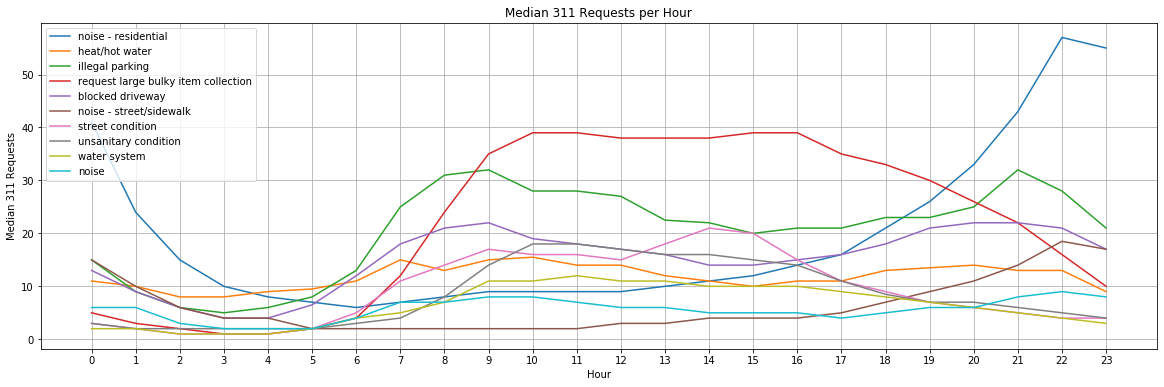

In [65]:
plt.figure(figsize=(20, 6))

for x in top_10:
  complaint_type1 = median_counts_hour[median_counts_hour.complaint_type==x]
  plt.plot(complaint_type1.hour, complaint_type1.median_requests, label = x)

plt.xticks(complaint_type1.hour)
plt.grid()
plt.title('Median 311 Requests per Hour')
plt.xlabel('Hour')
plt.ylabel('Median 311 Requests')
plt.legend(loc=2)



---


# Step 6. Trends by day of week

Reproduce the steps in 5, but this time aggregate by weekday, date, and complaint_type. Produce a similar plot where the x values will be the days of the week and the y values will be the median count of requests per complaint type

In [72]:
counts_week = filtered_311[['weekday', 'date', 'complaint_type']].groupby(['weekday', 'date', 'complaint_type']).size().reset_index(name='count_requests')
counts_week.head(20)

,weekday,date,complaint_type,count_requests
0,0,2018-08-06,blocked driveway,373
1,0,2018-08-06,heat/hot water,80
2,0,2018-08-06,illegal parking,473
3,0,2018-08-06,noise,108
4,0,2018-08-06,noise - residential,303
5,0,2018-08-06,noise - street/sidewalk,166
6,0,2018-08-06,request large bulky item collection,720
7,0,2018-08-06,street condition,330
8,0,2018-08-06,unsanitary condition,423
9,0,2018-08-06,water system,436


In [73]:
median_counts_week = counts_week.groupby(['weekday', 'complaint_type'])['count_requests'].median().reset_index(name = 'median_requests')
median_counts_week.head(12)

,weekday,complaint_type,median_requests
0,0,blocked driveway,372.0
1,0,heat/hot water,292.0
2,0,illegal parking,509.0
3,0,noise,147.0
4,0,noise - residential,419.0
5,0,noise - street/sidewalk,124.0
6,0,request large bulky item collection,666.0
7,0,street condition,301.0
8,0,unsanitary condition,270.0
9,0,water system,167.0


In [74]:
def recode_weekday(row):
  if row.weekday == 0:
    return str("Monday")
  elif row.weekday == 1:
    return str("Tuesday")
  elif row.weekday == 2:
    return str("Wednesday")
  elif row.weekday == 3:
    return str("Thursday")
  elif row.weekday == 4:
    return str("Friday")
  elif row.weekday == 5:
    return str("Saturday")
  elif row.weekday == 6:
    return str("Sunday")
  else:
    return 'Invalid weekday'

median_counts_week['weekday'] = median_counts_week.apply(recode_weekday, axis=1)
median_counts_week.head()

,weekday,complaint_type,median_requests
0,Monday,blocked driveway,372.0
1,Monday,heat/hot water,292.0
2,Monday,illegal parking,509.0
3,Monday,noise,147.0
4,Monday,noise - residential,419.0


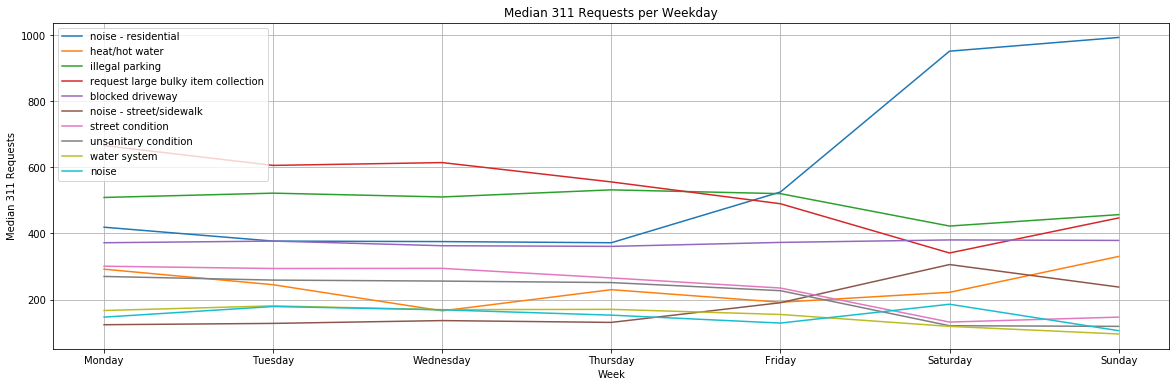

In [75]:
plt.figure(figsize=(20, 6))

for x in top_10:
  complaint_type2 = median_counts_week[median_counts_week.complaint_type==x]
  plt.plot(complaint_type2.weekday, complaint_type2.median_requests, label = x)

plt.xticks(complaint_type2.weekday)
plt.grid()
plt.title('Median 311 Requests per Weekday')
plt.xlabel('Week')
plt.ylabel('Median 311 Requests')
plt.legend(loc=2)



---



# Step 7. Trends by month

Reproduce the steps in 5, but this time aggregate by month, year (not date), and complaint_type. Produce a similar plot where x values will days of the week and y values will be the median count of requests per complaint type


In [51]:
counts_month = filtered_311[['month', 'year', 'complaint_type']].groupby(['month', 'year', 'complaint_type']).size().reset_index(name='count_requests')
counts_month.head(20)

,month,year,complaint_type,count_requests
0,1,2019,blocked driveway,11393
1,1,2019,heat/hot water,46387
2,1,2019,illegal parking,13189
3,1,2019,noise,4805
4,1,2019,noise - residential,16176
5,1,2019,noise - street/sidewalk,1760
6,1,2019,request large bulky item collection,14628
7,1,2019,street condition,7271
8,1,2019,unsanitary condition,7047
9,1,2019,water system,6198


In [52]:
median_counts_month = counts_month.groupby(['month', 'complaint_type'])['count_requests'].median().reset_index(name = 'median_requests')
median_counts_month.head(12)

,month,complaint_type,median_requests
0,1,blocked driveway,11393.0
1,1,heat/hot water,46387.0
2,1,illegal parking,13189.0
3,1,noise,4805.0
4,1,noise - residential,16176.0
5,1,noise - street/sidewalk,1760.0
6,1,request large bulky item collection,14628.0
7,1,street condition,7271.0
8,1,unsanitary condition,7047.0
9,1,water system,6198.0


In [77]:
def recode_month(row):
  if row.month == 1:
    return str("January")
  elif row.month == 2:
    return str("February")
  elif row.month == 3:
    return str("March")
  elif row.month == 4:
    return str("April")
  elif row.month == 5:
    return str("May")
  elif row.month == 6:
    return str("June")
  elif row.month == 7:
    return str("July")
  elif row.month == 8:
    return str("August")
  elif row.month == 9:
    return str("September")
  elif row.month == 10:
    return str("October")
  elif row.month == 11:
    return str("November")
  elif row.month == 12:
    return str("December")
  else:
    return 'Invalid month'

median_counts_month['month'] = median_counts_month.apply(recode_month, axis=1)
median_counts_month.head()

,month,complaint_type,median_requests
0,January,blocked driveway,11393.0
1,January,heat/hot water,46387.0
2,January,illegal parking,13189.0
3,January,noise,4805.0
4,January,noise - residential,16176.0


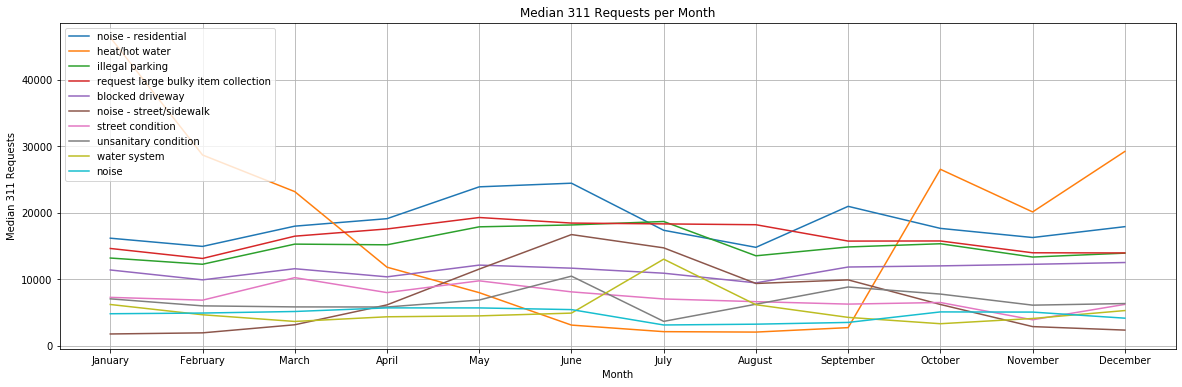

In [78]:
plt.figure(figsize=(20, 6))

for x in top_10:
  complaint_type2 = median_counts_month[median_counts_month.complaint_type==x]
  plt.plot(complaint_type2.month, complaint_type2.median_requests, label = x)

plt.xticks(complaint_type2.month)
plt.grid()
plt.title('Median 311 Requests per Month')
plt.xlabel('Month')
plt.ylabel('Median 311 Requests')
plt.legend(loc=2)




---




# Step 8.
Write a few sentences with your observations on how the occurrence of different complaint types varies over time, informed by the charts you produced in Steps 5-7.

**By Hour:** Not surprisingly, people complain more about residential noise during traditional "sleeping hours" (21:00 - 02:00). I also found it interesting, though not surprising, that complaints on "blocked driveways" saw a gradual increase right before morning rush hour and right after evening rush hour. Most other complaints seem to take place during traditional work hours, which makes sense since that is when people are awake and most likely to make a call. 

**By Day of Week:** Once again, residential noise complaints yielded the most complaints during the weekends - when people are most likely to be home and wanting to socialize/party. Most other complaints remained consistent throughout the week.

**By Month:** Heat/hot water complaints saw a dramatic increase during fall/winter months (October through February), which makes complete sense since those are the only months that people heavily rely on those services. Conversely, street/sidewalk noise sees a dramatic increase during the summer months, which is the time that people tend to socialize outside and/or host block parties. 
